In [32]:
# Transfer learning - resnet152V2 .ipynb

# import packages
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# load model # Accuracy=99.3 , validation Accuracy = 99.3 # heavy model, size =226MB
model_res = load_model('model/resnet152v2_acc_vacc_99_3.h5')  # resnet transfer learning

# model accept below hight and width of the image
img_width, img_hight = 224, 224


In [8]:
conda install opencv 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install keras==2.3.1

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\users\jaweria\miniconda3\envs\py37

  added / updated specs:
    - keras==2.3.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tensorboard-2.0.0          |     pyhb38c66f_1         3.2 MB
    tensorflow-2.0.0           |eigen_py37hbfc5123_0           4 KB
    tensorflow-base-2.0.0      |eigen_py37h01553b8_0        28.9 MB
    tensorflow-estimator-2.0.0 |     pyh2649769_0         250 KB
    ------------------------------------------------------------
                                           Total:        32.4 MB

The following NEW packages will be INSTALLED:

  _tflow_select      

In [38]:
# ------------------------------or-----------------------

# Own cnn  architecture - mask detection CNN.ipynb

# import packages
import cv2
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# load model # Accuracy=97.4 , validation Accuracy = 99.1 # very light model, size =5MB
model = load_model('model/model_acc_958_vacc_986_epoch_50.h5')  # cnn

# model accept below height and width of the image
img_width, img_hight = 200, 200

# ......................................

In [39]:
# Load the Cascade face Classifier
face_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")


In [78]:
# startt  web cam
#cap = cv2.VideoCapture(0)  # for webcam
cap = cv2.VideoCapture('MDvideo/Mask - 34775.mp4') # for video Mask - 34775.mp4

img_count_full = 0

# parameters for text
# font
font = cv2.FONT_HERSHEY_SIMPLEX
# org
org = (1, 1)
class_lable = ' '
# fontScale
fontScale = 1  # 0.5
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2  # 1

In [79]:
frames = []
# sart reading images and prediction
while True:
    img_count_full += 1

    # read image from webcam
    response, color_img = cap.read() #if image exist, response value will be true
    if response is False:
        break
    frames.append(color_img)
    
print(f"Done reading the video frames, total frames {len(frames)}")

Done reading the video frames, total frames 124


In [80]:
# read in a single frame
color_img = frames[0]  
print(f"Image size: {color_img.shape}")

#resize image with 50% ratio
scale = 50
width = int(color_img.shape[1] * scale/100)
height = int(color_img.shape[0] * scale/100)
dim = (width, height)
#resize image
color_img = cv2.resize(color_img, dim, interpolation = cv2.INTER_AREA)

print(f"Resized Image: {dim}")
print(f"Resized Image: {color_img.shape}")

Image size: (1440, 2560, 3)
Resized Image: (1280, 720)
Resized Image: (720, 1280, 3)


In [81]:
# Convert to grayscale
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)

In [82]:
# Detect the faces
faces = face_cascade.detectMultiScale(gray_img, 1.1, 6)  # 1.1, 3) for 1.mp4
print(f"Face detected at {faces}")

Face detected at [[447 119 379 379]]


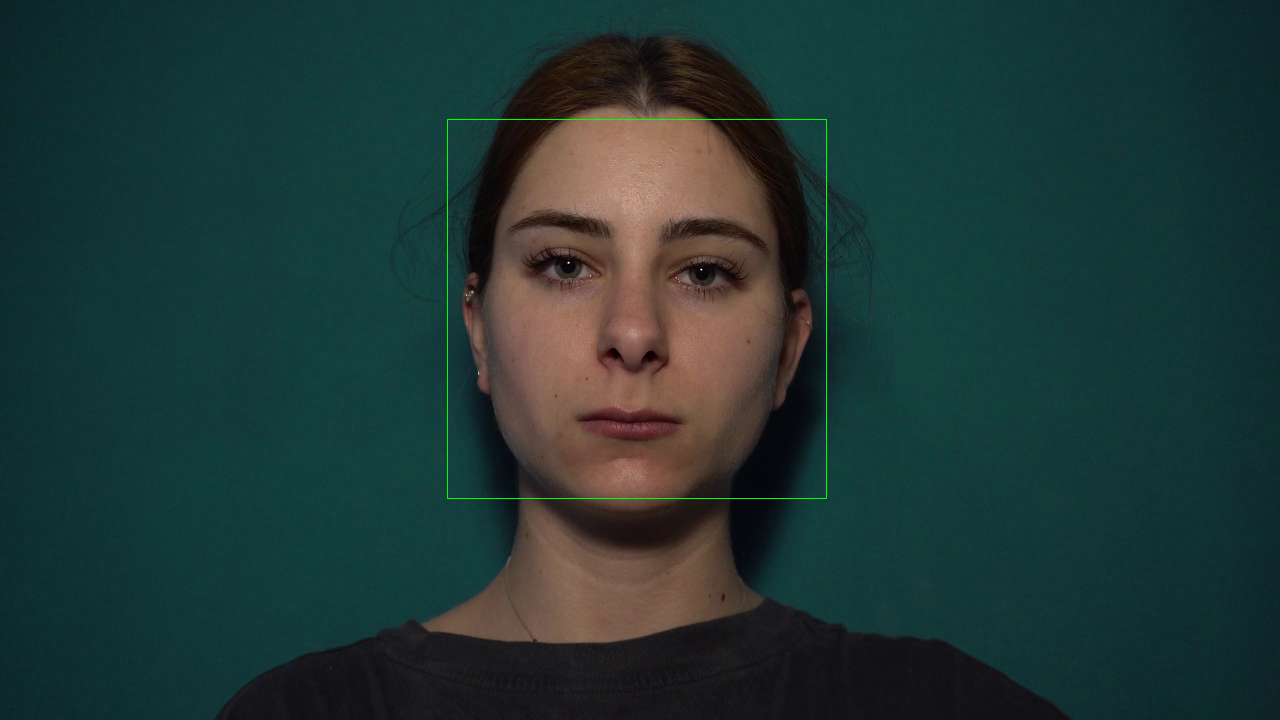

In [83]:
from PIL import Image
import matplotlib.pyplot as plt
x, y, w, h = faces[0]
TL = (x, y)  # top left
BR = (x + w, y + h) #bottom right

color_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
cv2.rectangle(color_img, TL, BR, (0, 255, 0))
Image.fromarray(color_img)

In [107]:
def resize_image(img: np.ndarray, scale: int):
    width = int(img.shape[1] * scale/100)
    height = int(img.shape[0] * scale/100)
    dim = (width, height)
    #resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img

def load_and_predict(imagepath, target_size=(200, 200)):
    img = load_img(imagepath, target_size=(img_width, img_hight)) 
    img = img_to_array(img) / 255 #convert image to array 
    img = np.expand_dims(img, axis=0)
    pred_prob = model.predict(img) #using the model I trained earlier
    return pred_prob


# loop through the images that are loaded in memory
for imgnum, color_img in enumerate(frames):
    # resize 50% of original
    color_img = resize_image(color_img, 50)
    
    # Convert to grayscale
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray_img, 1.1, 6)  # 1.1, 3) for 1.mp4
    
    # Draw the faces on the image
    for (x, y, w, h) in faces:
        TL = (x, y)  # top left
        BR = (x + w, y + h) #bottom right
        
        # crop the face and run prediction of mask/no mask
        color_face = color_img[y:y+h, x:x+w] # Crop
        
        # Save the image
        cv2.imwrite(f"temp/{imgnum + 1}_of{len(frames)}.jpg", color_img)
        
        # load using PIL and run the inference
        pred_scores = load_and_predict(f"temp/{imgnum + 1}_of{len(frames)}.jpg")
        
        pred_class: int = np.argmax(pred_scores)
        pred_confidence: float = np.max(pred_scores)
        
        if pred_class == 0:
            print(f"Mask {pred_scores}")
            label = "Mask"
        else:
            print(f"No Mask {pred_scores}")
            label = "No Mask"
            
        cv2.putText(color_img, label, (x-10, y-10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 255))
        cv2.rectangle(color_img, TL, BR, (0, 255, 0))
            
    cv2.imwrite(f"temp/{imgnum + 1}_of{len(frames)}.jpg", color_img)
    
    

No Mask [[0.04838025 0.95161974]]
No Mask [[0.04781464 0.95218533]]
No Mask [[0.05233711 0.94766295]]
No Mask [[0.03626552 0.9637345 ]]
No Mask [[0.0372496  0.96275043]]
No Mask [[0.0127224  0.98727757]]
No Mask [[0.04938367 0.9506163 ]]
Mask [[0.63864684 0.36135316]]
Mask [[0.6860194  0.31398058]]
Mask [[0.66638553 0.3336145 ]]
Mask [[0.75362235 0.24637762]]
Mask [[0.8984302  0.10156973]]
Mask [[0.8221236  0.17787643]]
Mask [[0.7191931 0.2808069]]
Mask [[0.8252473  0.17475276]]
Mask [[0.8874826  0.11251741]]
Mask [[0.8993717  0.10062826]]
Mask [[0.8822917  0.11770833]]
Mask [[0.90079254 0.09920745]]
Mask [[0.87826735 0.12173265]]
Mask [[0.88858044 0.11141954]]
Mask [[0.85009927 0.14990076]]
Mask [[0.8161005 0.1838995]]
Mask [[0.84010273 0.15989725]]
Mask [[0.80923533 0.1907647 ]]
Mask [[0.8288946  0.17110538]]
Mask [[0.8373167  0.16268331]]
Mask [[0.846711   0.15328899]]
Mask [[0.84702    0.15298007]]
Mask [[0.8163623  0.18363763]]
Mask [[0.7718205 0.2281795]]
Mask [[0.70492464 0.2950

In [ ]:
 # take face then predict class mask or not mask then draw recrangle and text then display image
img_count = 0
for (x, y, w, h) in faces:
    org = (x - 10, y - 10)
    img_count += 1
    color_face = color_img[y:y + h, x:x + w]  # color face
    cv2.imwrite('faces/input/%d%dface.jpg' % (img_count_full, img_count), color_face)
    img = load_img('faces/input/%d%dface.jpg' % (img_count_full, img_count), target_size=(img_width, img_hight))

    img = img_to_array(img) / 255 #convert image to array 
    img = np.expand_dims(img, axis=0)
    pred_prob = model.predict(img) #using the model I trained earlier
    # print(pred_prob[0][0].round(2))
    pred = np.argmax(pred_prob) #we want result for max probablity b/w 0 & 1

    if pred == 0:
        print("User with mask - predic = ", pred_prob[0][0])
        class_lable = "Mask"
        color = (255, 0, 0)
        cv2.imwrite('faces/input/%d%dface.jpg' % (img_count_full, img_count), color_face)

    else:
        print('user not wearing mask - prob = ', pred_prob[0][1])
        class_lable = "No Mask"
        color = (0, 255, 0)
        cv2.imwrite('faces/without_mask/%d%dface.jpg' % (
            img_count_full, img_count), color_face)

    cv2.rectangle(color_img, (x, y), (x + w, y + h), (0, 0, 255), 3)
    # Using cv2.putText() method
    cv2.putText(color_img, class_lable, org, font,
                fontScale, color, thickness, cv2.LINE_AA)

In [108]:
# display image
cv2.imshow('LIVE face mask detection', color_img)

if cv2.waitKey(1) & 0xFF == ord('q'):
    sys.exit()

In [109]:
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()